### Imports

In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # Not enough people know this exists
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import norm
# Import ML
# from xgboost import XGBRegressor
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
LabelEnc = preprocessing.LabelEncoder()
OHE = preprocessing.OneHotEncoder()

### Reading a sample of the data

In [3]:
train = pd.read_csv(r'E:/Downloads/Housing/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Correlation heatmap to find more important features

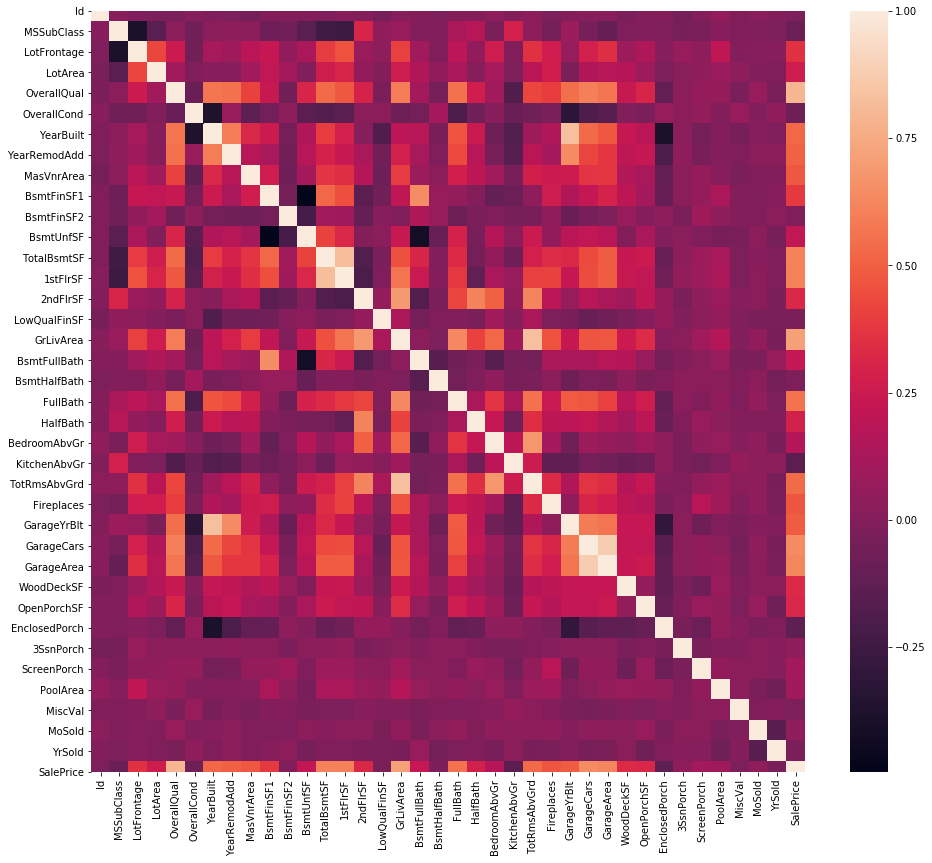

In [5]:
corr = train.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr)

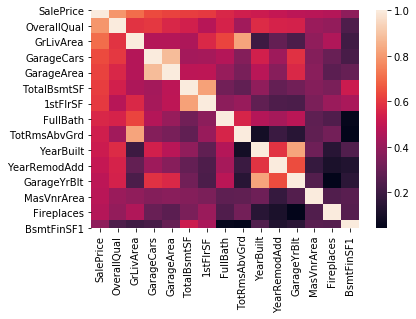

In [10]:
largest = corr.SalePrice.nlargest(15)
sns.heatmap(corr.loc[largest.index,largest.index])

In [9]:
corr.SalePrice.nlargest(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [127]:
train[corr.SalePrice.nlargest(15).index].isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
BsmtFinSF1       0
dtype: int64

#### Since some of the columns here are correlated with one another, we'll only look at one of them, let's begin:

# SalePrice

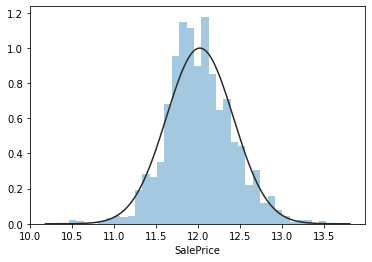

In [35]:
sns.distplot(np.log(train['SalePrice']),fit=norm, kde=False);

### When applying a log the data becomes much more normally distributed
### Will probably work on the manipulated and just apply a exp to the test answer

# OverallQual

In [42]:
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

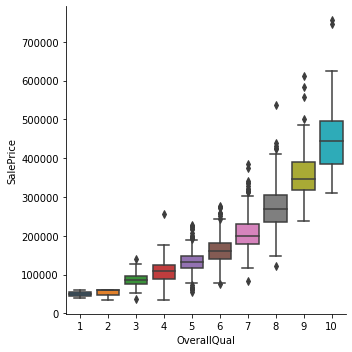

In [85]:
sns.catplot(x='OverallQual', y='SalePrice', kind='box', data=train)

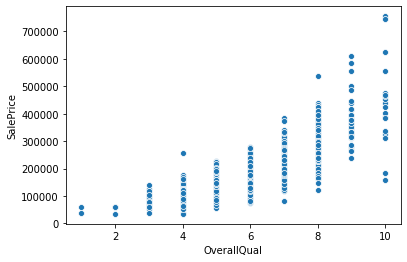

In [36]:
sns.scatterplot(x=train['OverallQual'], y=train['SalePrice'])

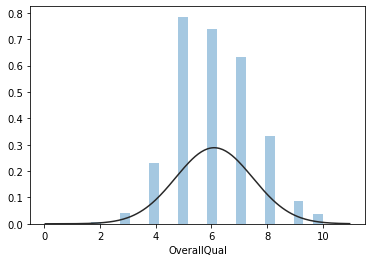

In [39]:
sns.distplot(train['OverallQual'],fit=norm, kde=False);

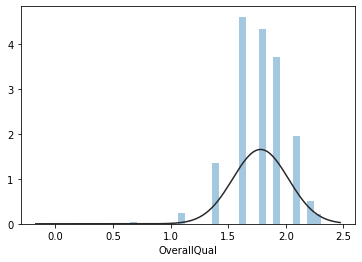

In [40]:
sns.distplot(np.log(train['OverallQual']),fit=norm, kde=False);

## No need for a log here, data is pretty normally distributed, plus it's more catagorial than numerical, so applying math on it doesn't matter too much

# GrLivArea

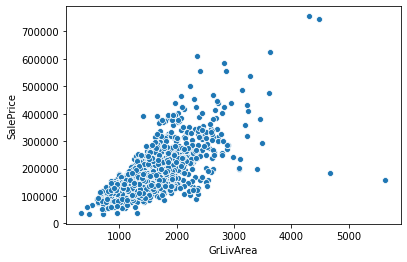

In [43]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [56]:
train.drop(index=train.GrLivArea.nlargest(2).index,inplace=True)

### Removed the outliers 

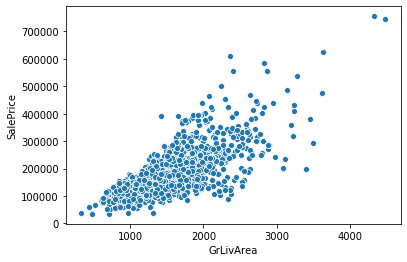

In [57]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

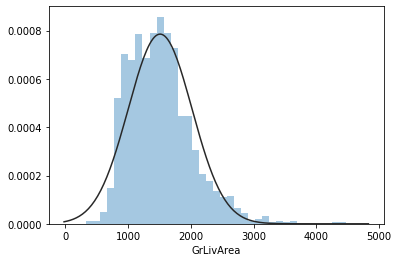

In [58]:
sns.distplot(train['GrLivArea'], fit=norm, kde=False);

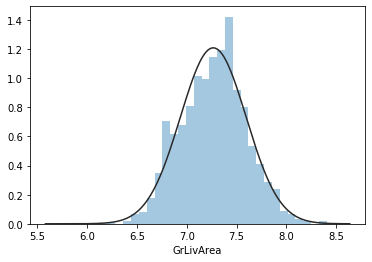

In [59]:
sns.distplot(np.log(train['GrLivArea']),fit=norm, kde=False);

## Same as SalePrice

# GarageArea
#### (Chose this over GarageCars because it's numerical and the model will hopefully deal with it better)

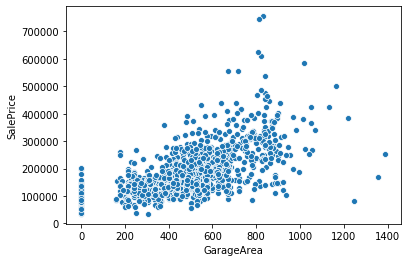

In [60]:
sns.scatterplot(x=train['GarageArea'], y=train['SalePrice'])

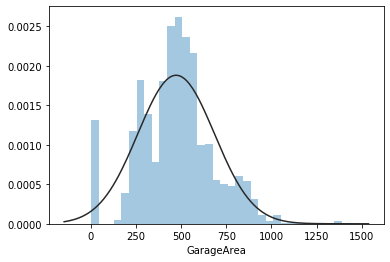

In [63]:
sns.distplot(train['GarageArea'], fit=norm, kde=False);

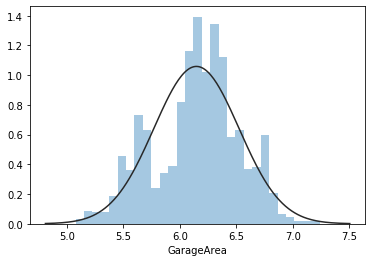

In [69]:
g_logged = train['GarageArea'].apply(lambda x: x if x == 0 else np.log(x))
sns.distplot(g_logged[g_logged > 0], fit=norm, kde=False);

## Not sure about this one, maybe try other stuff later, probably remove the outliers

# TotalBsmtSF

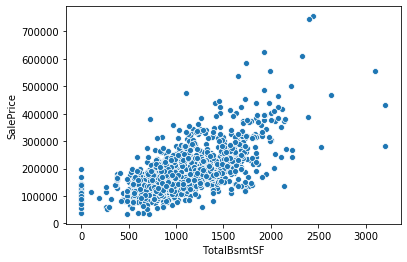

In [72]:
sns.scatterplot(x=train['TotalBsmtSF'], y=train['SalePrice'])

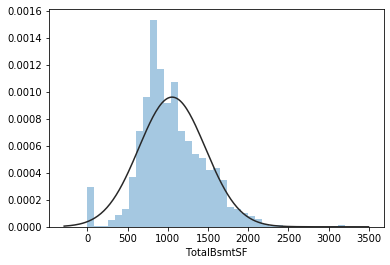

In [74]:
sns.distplot(train['TotalBsmtSF'], fit=norm, kde=False);

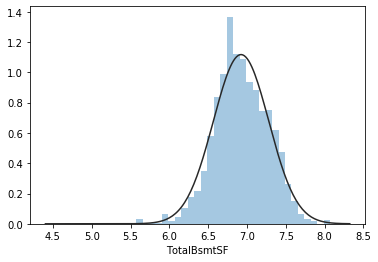

In [75]:
g_logged = train['TotalBsmtSF'].apply(lambda x: x if x == 0 else np.log(x))
sns.distplot(g_logged[g_logged > 0], fit=norm, kde=False);

## Log is the way here too

# FullBath

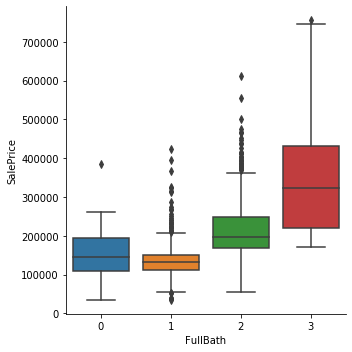

In [87]:
sns.catplot(x='FullBath', y='SalePrice', kind='box', data=train)

## The outlier in the 700k+ keeps showing, will remove

In [88]:
train.drop(index=train.SalePrice.nlargest(1).index, inplace=True)

# YearBuilt

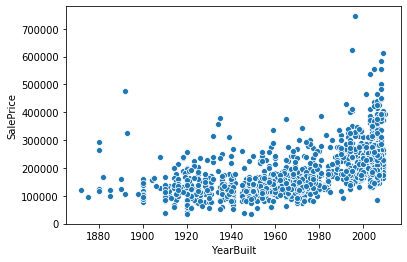

In [92]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)

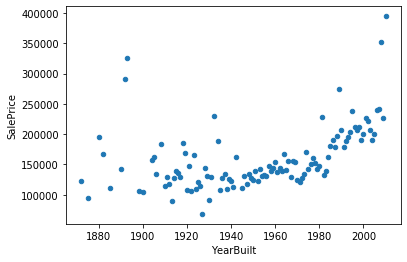

In [115]:
train.groupby('YearBuilt')['SalePrice'].median().reset_index().plot(x='YearBuilt', y='SalePrice', kind='scatter')

## I can see that the age the house is does not necessarily mean it's more expensive, but it's I think it also matters so:

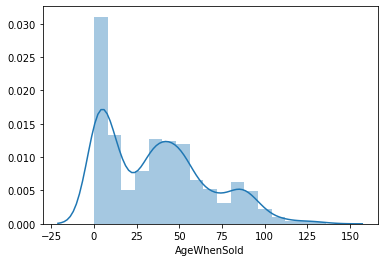

In [118]:
train['AgeWhenSold'] = train['YrSold'] - train['YearBuilt']
sns.distplot(train['AgeWhenSold'])

In [124]:
train[['AgeWhenSold', 'YearBuilt','SalePrice']].corr()

,AgeWhenSold,YearBuilt,SalePrice
AgeWhenSold,1.000000,-0.999034,-0.529881
YearBuilt,-0.999034,1.000000,0.529537
SalePrice,-0.529881,0.529537,1.000000


## Oops. Maybe not lul

# MasVnrArea

In [133]:
train['MasVnrArea'].isnull().sum()

8

In [134]:
train[train.MasVnrArea.isnull()]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [135]:
train.MasVnrArea.fillna(0, inplace=True)

#### Looking at these nulls, replacing them with 0 is probably the way to go, maybe removing them too though

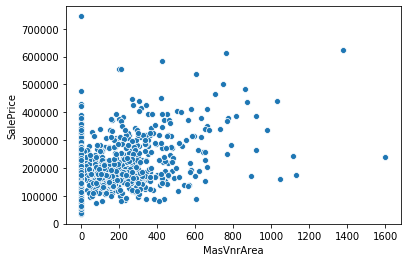

In [128]:
sns.scatterplot(x=train['MasVnrArea'], y=train['SalePrice'])

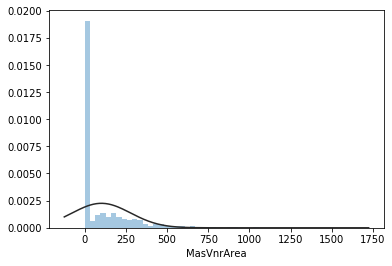

In [136]:
sns.distplot(train['MasVnrArea'], fit=norm, kde=False);

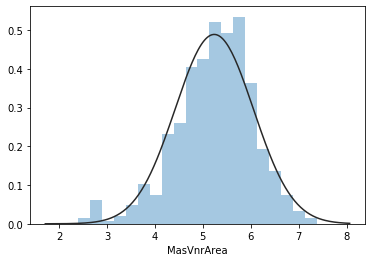

In [137]:
g_logged = train['MasVnrArea'].apply(lambda x: x if x == 0 else np.log(x))
sns.distplot(g_logged[g_logged > 0], fit=norm, kde=False);

In [138]:
train[train.MasVnrArea == 0].shape

(869, 82)

### Not sure what to do since it's pretty correlated, but on the other hand very empty

In [140]:
train['HasMasVnr'] = 0
train.loc[train['MasVnrArea'] != 0,'HasMasVnr'] = 1

In [143]:
train[['HasMasVnr', 'MasVnrArea','SalePrice']].corr() # NOPE

,HasMasVnr,MasVnrArea,SalePrice
HasMasVnr,1.000000,0.697189,0.362021
MasVnrArea,0.697189,1.000000,0.462166
SalePrice,0.362021,0.462166,1.000000


# Fireplaces

In [145]:
train['Fireplaces'].value_counts()

0    690
1    649
2    114
3      4
Name: Fireplaces, dtype: int64

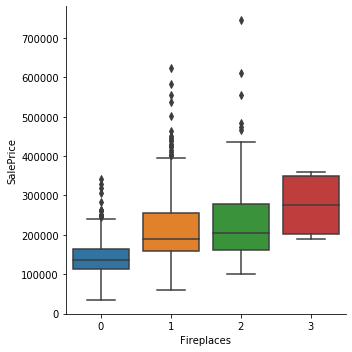

In [146]:
sns.catplot(x='Fireplaces', y='SalePrice', kind='box', data=train)

In [148]:
train['HasFirePlace'] = 0
train.loc[train['Fireplaces'] != 0,'HasFirePlace'] = 1

In [150]:
train[['HasFirePlace', 'Fireplaces','SalePrice']].corr() # Yep this is better

,HasFirePlace,Fireplaces,SalePrice
HasFirePlace,1.000000,0.902904,0.476404
Fireplaces,0.902904,1.000000,0.468336
SalePrice,0.476404,0.468336,1.000000


## Going with HasFirePlace over the number since there is a big jump between none to some

# Up next: Non Numeric Categorical Features!!!!